In [83]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization

# Load the dataset
file_path = '/Users/shivanshmundra/Downloads/FedFolio/FidelFolio_Dataset.csv'  
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Year,Company,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Target 1,Target 2,Target 3
0,1999,Hind. Unilever,15.0,65.87,54.57,41.12,45.82,123.34,0.65,33131.93,...,19.581982,1192.76,1222.04,1120.99,1091.71,1956.94,264.31,5.38,29.08,42.37
1,1999,ITC,66.0,35.77,32.29,37.91,36.37,-269.26,0.57,23632.98,...,10.904040,1040.32,1249.28,1146.99,938.03,3486.42,1252.22,-67.4,-23.41,-33.87
2,1999,Wipro,79.0,31.40,46.55,164.42,74.72,348.29,1.61,18438.55,...,44.860469,182.67,218.26,153.73,118.14,828.14,281.07,538.95,60.23,108.3
3,1999,O N G C,37.0,13.78,11.82,6.12,3.23,6.02,1.19,16868.75,...,0.695653,4269.99,5100.39,4404.90,3574.50,32398.94,8150.14,-29.06,4.07,124.85
4,1999,Lila Worldwide,NaN,0.16,0.14,"5,715.31",-4.41,NaN,"-1,094.90",14916.95,...,4.154480,4.59,4.77,3.09,2.91,3590.57,NaN,150.06,598.24,"1,057.39"


In [84]:
print("Dataset shape:", df.shape)
print("\nData types:\n")
print(df.dtypes)

# Basic info
df.info()

Dataset shape: (24751, 33)

Data types:

Year            int64
Company        object
Feature1      float64
Feature2      float64
Feature3      float64
Feature4       object
Feature5       object
Feature6       object
Feature7       object
Feature8      float64
Feature9       object
Feature10     float64
Feature11     float64
Feature12     float64
Feature13     float64
Feature14     float64
Feature15     float64
Feature16     float64
Feature17     float64
Feature18     float64
Feature19     float64
Feature20     float64
Feature21     float64
Feature22     float64
Feature23     float64
Feature24     float64
Feature25     float64
Feature26     float64
Feature27     float64
Feature28     float64
 Target 1      object
 Target 2      object
 Target 3      object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24751 entries, 0 to 24750
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        24751 non-n

In [87]:

print(df['Feature9'].unique())

[ 0.0000e+00  2.0000e-02 -1.0000e-02  1.3000e-01  1.0000e-02  3.0000e-02
 -2.0000e-02  6.0000e-02  4.0000e-02  8.0000e-02  1.0000e-01  5.0000e-02
         nan -3.0000e-02  9.0000e-02  1.4000e-01  1.6000e-01  5.2000e-01
 -4.0000e-02  3.2000e-01 -5.0000e-02  1.1000e-01  9.5000e-01  1.7000e-01
  4.7000e-01  8.3000e-01  5.5000e-01  1.8000e-01  4.8000e-01  1.5000e-01
  1.2000e-01 -7.0000e-02 -9.0000e-02  1.1300e+00  3.4000e-01  8.4000e-01
  4.2000e-01 -1.0000e-01  2.5000e-01  1.9400e+00  5.8000e-01  7.0000e-02
 -1.1000e-01  6.5000e-01 -1.7000e-01  7.2000e-01  2.1800e+00 -1.2000e-01
  2.9000e-01  7.8000e-01  2.1000e-01  2.4000e-01  3.9000e-01 -1.4000e-01
  3.8000e-01  1.0000e+00  1.0900e+00 -1.6000e-01  7.6000e-01 -6.0000e-02
  2.2000e-01 -2.0000e-01  5.9000e-01 -1.3000e-01 -1.9000e-01  4.0000e-01
 -1.8000e-01  4.9000e-01  1.1500e+00  3.3000e-01 -2.3000e-01 -1.5000e-01
  9.7000e-01  1.8000e+00  1.7300e+00 -8.0000e-02  2.3000e-01  9.0000e-01
 -2.8000e-01  3.1100e+00  3.8300e+00  1.0700e+00 -2

In [88]:
# Clean Feature9 specifically
df['Feature9'] = df['Feature9'].astype(str).str.replace(',', '')              # remove commas (if any)
df['Feature9'] = df['Feature9'].str.strip()                                   # remove extra whitespace
df['Feature9'] = df['Feature9'].replace(['-', ' -   ', 'nan', 'N/A', '--'], 0)  # replace problematic entries
df['Feature9'] = pd.to_numeric(df['Feature9'], errors='coerce')              # convert to float


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter-friendly settings
%matplotlib inline
sns.set(style='whitegrid')

# 📥 Step 2: Load the dataset
file_path = '/Users/shivanshmundra/Downloads/FedFolio/FidelFolio_Dataset.csv'  # Update if needed
df = pd.read_csv(file_path)

# 📋 Step 3: Initial data check
print("Shape of the dataset:", df.shape)

# 🧹 Step 4: Clean numeric columns (remove commas) — careful, exclude 'Company'
object_cols = df.select_dtypes(include='object').columns.tolist()
exclude_cols = ['Company', 'Year']  # Keep identifiers
columns_to_convert = [col for col in object_cols if col not in exclude_cols and df[col].astype(str).str.contains(',').any()]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

print("\nData types after conversion:\n", df.dtypes)

Shape of the dataset: (24751, 33)

Data types after conversion:
 Year            int64
Company        object
Feature1      float64
Feature2      float64
Feature3      float64
Feature4      float64
Feature5      float64
Feature6      float64
Feature7      float64
Feature8      float64
Feature9       object
Feature10     float64
Feature11     float64
Feature12     float64
Feature13     float64
Feature14     float64
Feature15     float64
Feature16     float64
Feature17     float64
Feature18     float64
Feature19     float64
Feature20     float64
Feature21     float64
Feature22     float64
Feature23     float64
Feature24     float64
Feature25     float64
Feature26     float64
Feature27     float64
Feature28     float64
 Target 1     float64
 Target 2     float64
 Target 3     float64
dtype: object


In [91]:
df.head()

,Year,Company,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Target 1,Target 2,Target 3
0,1999,Hind. Unilever,15.0,65.87,54.57,41.12,45.82,123.34,0.65,33131.93,...,19.581982,1192.76,1222.04,1120.99,1091.71,1956.94,264.31,5.38,29.08,42.37
1,1999,ITC,66.0,35.77,32.29,37.91,36.37,-269.26,0.57,23632.98,...,10.904040,1040.32,1249.28,1146.99,938.03,3486.42,1252.22,-67.40,-23.41,-33.87
2,1999,Wipro,79.0,31.40,46.55,164.42,74.72,348.29,1.61,18438.55,...,44.860469,182.67,218.26,153.73,118.14,828.14,281.07,538.95,60.23,108.30
3,1999,O N G C,37.0,13.78,11.82,6.12,3.23,6.02,1.19,16868.75,...,0.695653,4269.99,5100.39,4404.90,3574.50,32398.94,8150.14,-29.06,4.07,124.85
4,1999,Lila Worldwide,NaN,0.16,0.14,5715.31,-4.41,NaN,-1094.90,14916.95,...,4.154480,4.59,4.77,3.09,2.91,3590.57,NaN,150.06,598.24,1057.39


In [155]:
df.max(axis = 0) 

Year               2024
Company         eMudhra
Feature1         1716.0
Feature2          69.44
Feature3          67.61
Feature4         1421.3
Feature5         497.38
Feature6         943.16
Feature7          11.26
Feature8      159791.72
Feature10       8599.74
Feature11        872.72
Feature12       15162.0
Feature13     296390.44
Feature14      22378.69
Feature15       7938.47
Feature16      97067.92
Feature17      20931.65
Feature18      95693.52
Feature19       58317.0
Feature20       4974.88
Feature21        9003.7
Feature22     36.914104
Feature23      16244.35
Feature24      28060.96
Feature25      24155.43
Feature26       12846.3
Feature27      170634.7
Feature28      237766.0
 Target 1        390.93
 Target 2        713.41
 Target 3       1192.54
dtype: object

In [92]:
df.isnull().sum()

Year             0
Company          0
Feature1      3837
Feature2      2752
Feature3      1981
Feature4       547
Feature5       603
Feature6       701
Feature7       477
Feature8         0
Feature9      1237
Feature10      726
Feature11      544
Feature12      459
Feature13       22
Feature14       35
Feature15      553
Feature16      126
Feature17       49
Feature18      126
Feature19       27
Feature20      367
Feature21      417
Feature22      187
Feature23       45
Feature24       46
Feature25       50
Feature26       49
Feature27       24
Feature28     2032
 Target 1     1787
 Target 2     3342
 Target 3     4866
dtype: int64

In [51]:
df.describe()

,Year,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature10,...,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Target 1,Target 2,Target 3
count,24751.000000,20914.000000,21999.000000,22770.000000,2.420400e+04,2.414800e+04,24050.000000,24274.000000,2.475100e+04,24025.000000,...,24564.000000,24706.000000,24705.000000,24701.000000,24702.000000,2.472700e+04,2.271900e+04,22964.000000,21409.000000,19885.000000
mean,2012.952972,148.094357,17.857211,15.883015,8.044175e+02,-7.074814e+02,-6.263392,0.073667,9.498492e+03,128.348474,...,5.964409,806.636171,1466.142041,1252.019445,592.415449,9.612212e+03,1.268924e+04,18.040291,37.758500,68.662595
std,7.368602,1985.689454,15.149271,21.162288,1.104263e+05,1.117096e+05,3979.779013,64.429016,4.568186e+04,3404.341356,...,290.323524,4096.404868,7543.395905,6993.588813,3337.552197,6.984420e+04,1.095691e+05,130.229198,252.000492,463.939590
min,1999.000000,0.010000,-109.440000,-808.950000,-3.000000e+04,-1.735738e+07,-484740.000000,-5634.500000,2.363000e+01,-54666.770000,...,-1018.341463,-42309.000000,-42247.000000,-46404.300000,-61797.000000,-1.459900e+04,1.000000e-02,-178.490000,-204.900000,-344.270000
25%,2007.000000,7.000000,9.030000,7.210000,5.860000e+00,1.417500e+00,-7.435000,0.150000,3.403250e+02,-85.220000,...,0.938619,32.290000,51.030000,35.160000,17.215000,3.229300e+02,6.593000e+01,-32.010000,-48.670000,-64.100000
50%,2014.000000,52.000000,14.830000,14.390000,1.351500e+01,7.410000e+00,3.120000,0.670000,1.027400e+03,-7.500000,...,1.979459,108.440000,153.230000,114.710000,73.505000,9.396800e+02,3.020400e+02,-4.165000,-8.250000,-11.930000
75%,2019.000000,125.750000,23.220000,22.357500,2.751000e+01,2.049250e+01,23.130000,1.110000,3.910885e+03,55.420000,...,4.115079,363.430000,520.570000,404.290000,264.290000,3.213700e+03,1.378075e+03,35.532500,56.200000,82.220000
max,2024.000000,227428.000000,444.800000,934.770000,1.717728e+07,1.849536e+05,192607.000000,5416.000000,2.014010e+06,101904.000000,...,45253.666670,155559.000000,354825.220000,350976.090000,104727.000000,5.252252e+06,5.606147e+06,10523.790000,16603.820000,29387.270000


In [52]:
df.corr()

,Year,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature10,...,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Target 1,Target 2,Target 3
Year,1.000000,-0.009144,-0.070129,-0.053934,-0.008639,0.009904,-0.006895,0.006676,0.149460,-0.004043,...,0.003795,0.116483,0.113401,0.103647,0.103875,0.089681,0.072729,-0.018016,-0.026339,-0.060161
Feature1,-0.009144,1.000000,-0.107976,-0.059352,-0.001689,-0.000503,0.000036,-0.000522,-0.007781,0.008283,...,-0.008041,-0.009682,0.000847,0.001272,-0.012286,0.000737,0.009110,0.006340,0.008915,0.006783
Feature2,-0.070129,-0.107976,1.000000,0.630029,-0.053723,0.007943,0.007232,0.006069,0.065132,-0.071222,...,-0.002988,0.034674,0.000088,0.011405,0.061009,-0.045277,-0.056030,0.014713,-0.012265,-0.016440
Feature3,-0.053934,-0.059352,0.630029,1.000000,-0.034770,0.005177,0.003959,0.005571,0.048665,-0.011787,...,-0.001303,0.044776,0.010727,0.015298,0.063970,0.003891,-0.017006,0.029169,0.002676,-0.013290
Feature4,-0.008639,-0.001689,-0.053723,-0.034770,1.000000,-0.562385,-0.065940,0.092631,0.022835,-0.000828,...,0.002348,-0.001389,-0.001374,-0.001266,-0.001254,-0.000637,-0.003082,-0.002197,-0.008720,-0.007484
Feature5,0.009904,-0.000503,0.007943,0.005177,-0.562385,1.000000,0.019237,0.000016,-0.022803,-0.000841,...,-0.000824,0.001266,0.001241,0.001141,0.001141,0.000554,-0.000693,0.000225,-0.001734,-0.002100
Feature6,-0.006895,0.000036,0.007232,0.003959,-0.065940,0.019237,1.000000,-0.015160,0.000260,-0.001518,...,0.011821,0.001537,0.000985,0.000903,0.001558,0.001197,-0.000703,-0.008275,-0.006008,-0.007895
Feature7,0.006676,-0.000522,0.006069,0.005571,0.092631,0.000016,-0.015160,1.000000,0.001509,-0.003516,...,0.001457,0.002074,0.001207,0.000912,0.001733,0.001020,0.000017,0.013704,0.008798,0.007273
Feature8,0.149460,-0.007781,0.065132,0.048665,0.022835,-0.022803,0.000260,0.001509,1.000000,0.007517,...,0.001159,0.811666,0.672857,0.628510,0.792410,0.498466,0.360420,-0.022958,-0.027210,-0.029033
Feature10,-0.004043,0.008283,-0.071222,-0.011787,-0.000828,-0.000841,-0.001518,-0.003516,0.007517,1.000000,...,-0.000826,-0.043673,0.105659,0.139243,-0.000692,0.049371,0.171470,-0.002174,-0.007951,-0.006641


In [57]:
id_cols = ['Year', 'Company']
target_cols = ['Target1', 'Target2', 'Target3']
feature_cols = [col for col in df.columns if col not in id_cols + target_cols]

# Get unique counts
unique_counts = df[feature_cols].nunique().sort_values()

# Display as DataFrame
unique_counts_df = unique_counts.reset_index()
unique_counts_df.columns = ['Feature', 'UniqueValues']
unique_counts_df

,Feature,UniqueValues
0,Feature9,790
1,Feature1,1442
2,Feature7,1854
3,Feature2,5277
4,Feature3,5777
5,Feature4,8968
6,Feature5,9316
7,Feature20,10877
8,Feature6,11790
9,Target 1,13782


In [60]:
numeric_feature_cols = df[feature_cols].select_dtypes(include='number').columns.tolist()


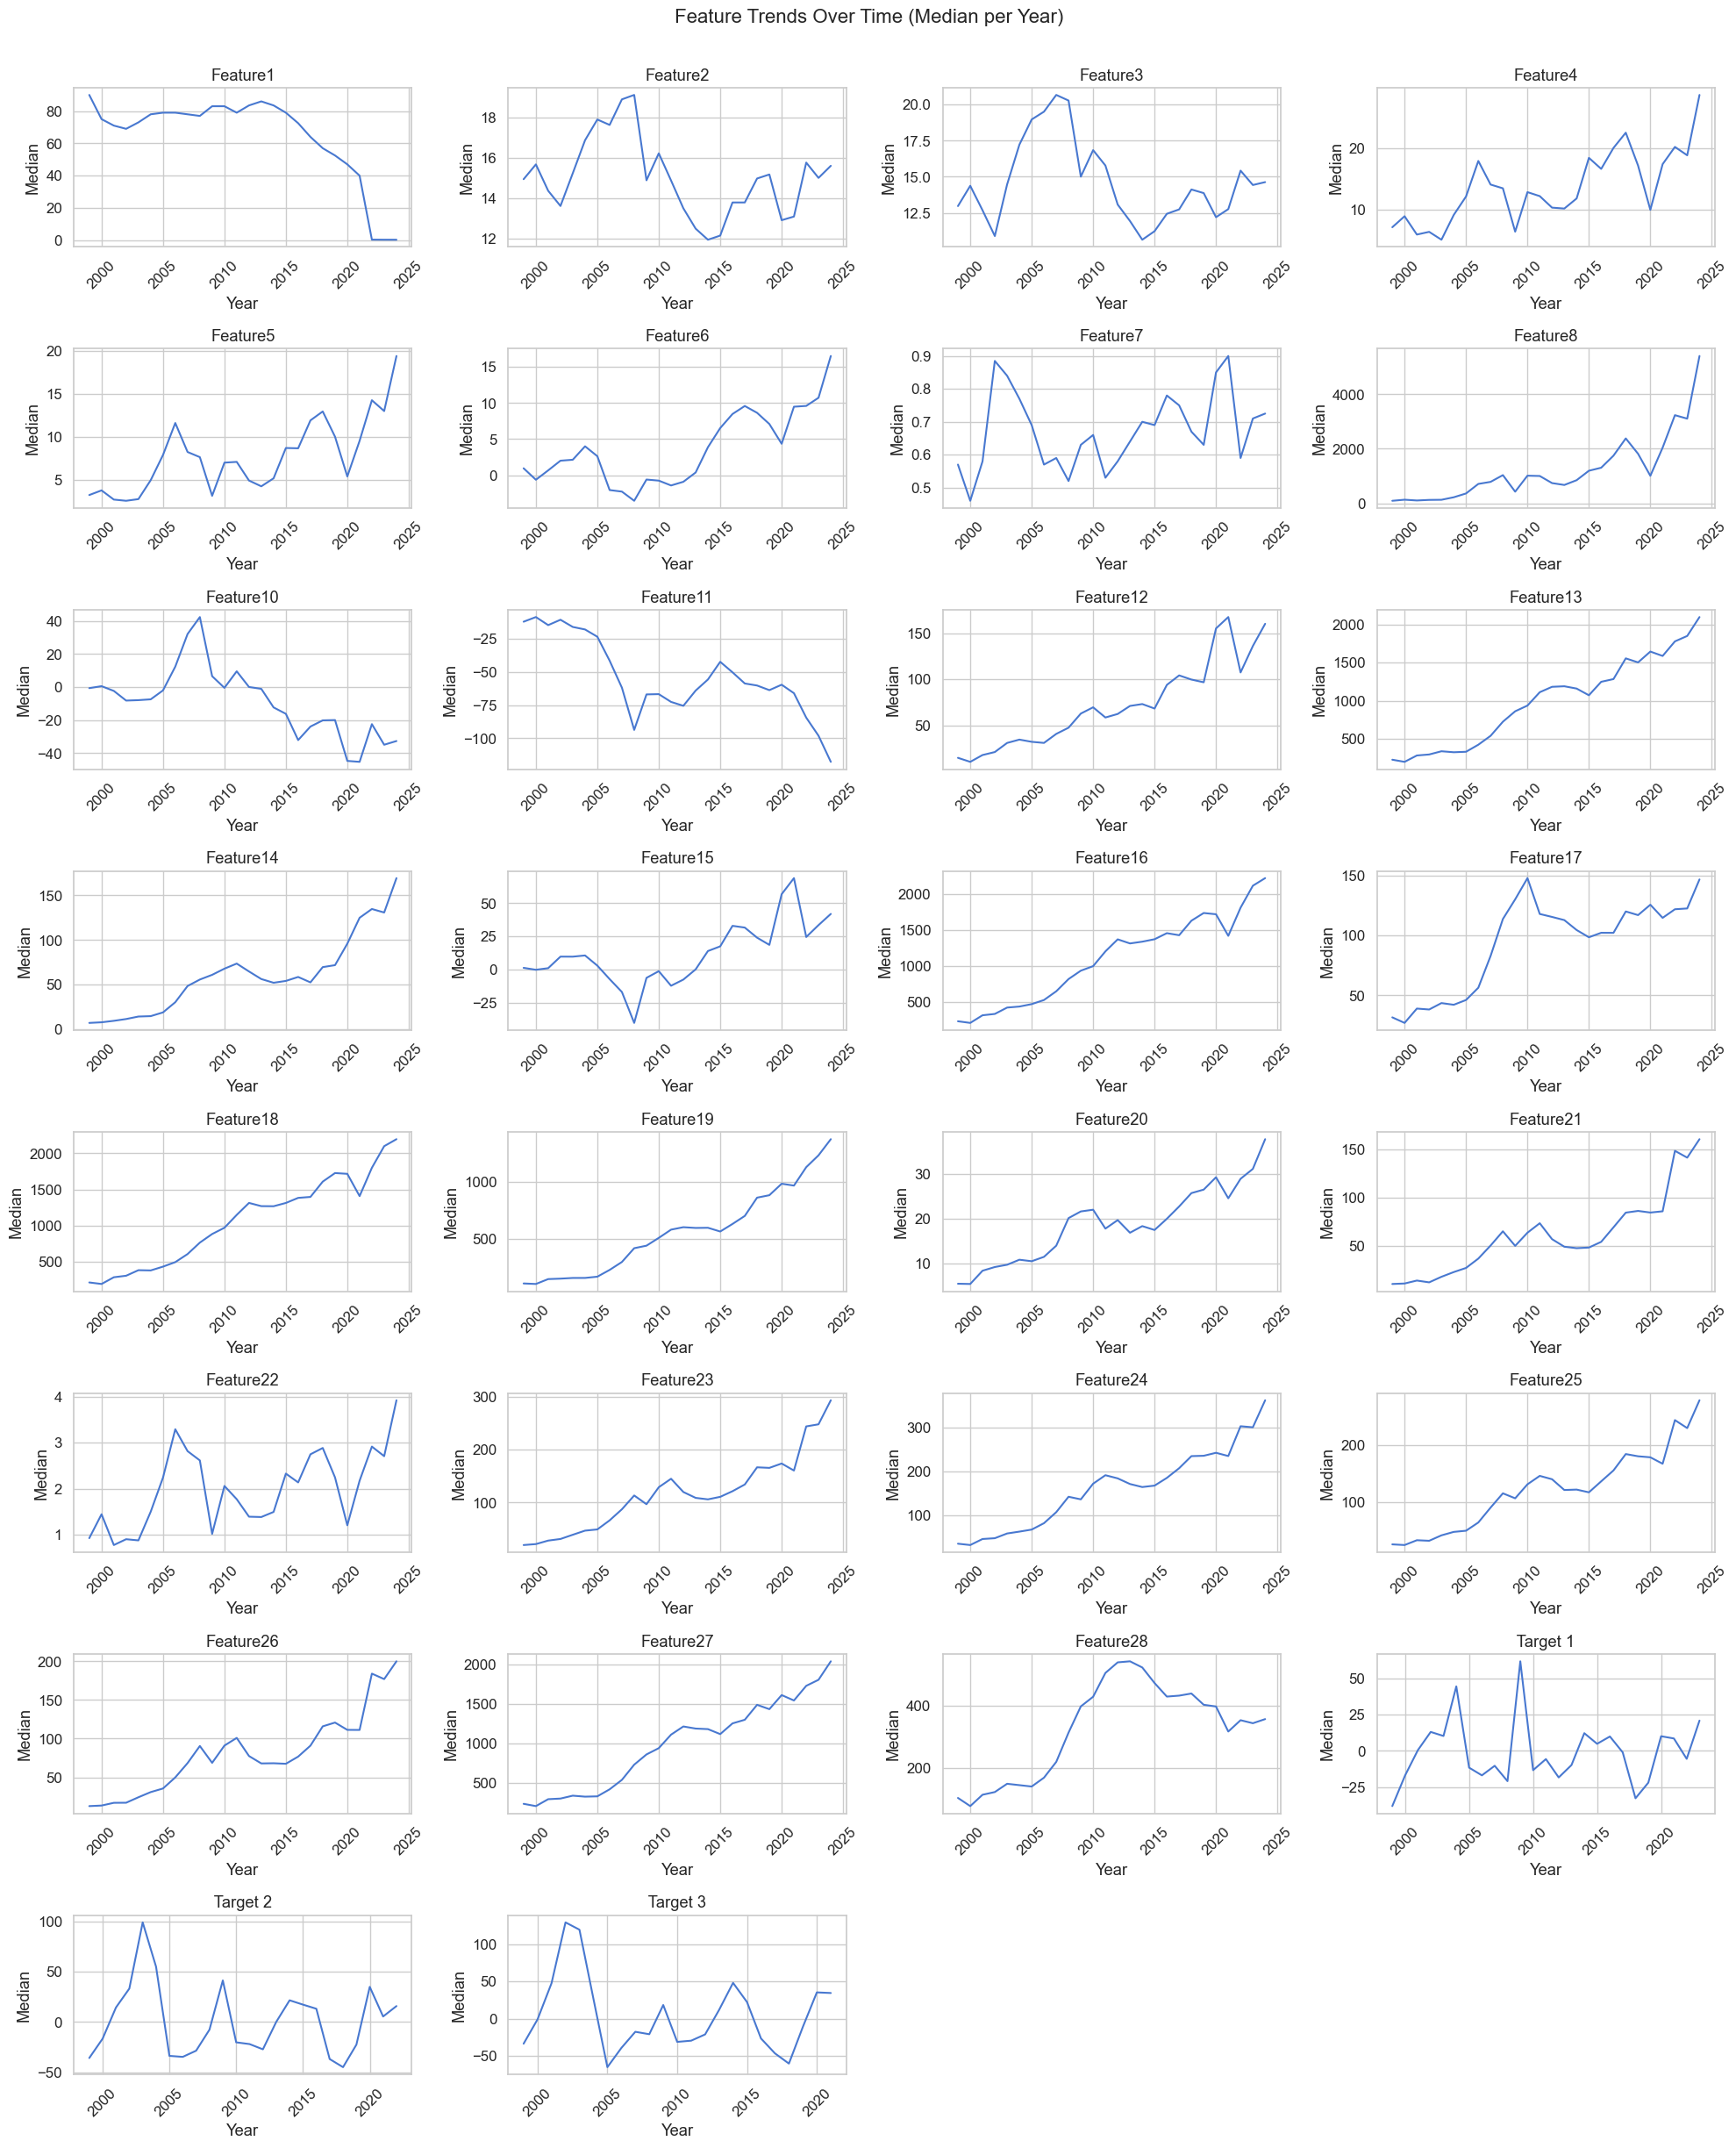

In [62]:
# Ensure feature columns are numeric (exclude object or string types)
numeric_feature_cols = df[feature_cols].select_dtypes(include='number').columns.tolist()

# Now group by Year and calculate median
feature_trends = df.groupby('Year')[numeric_feature_cols].median()

# Plot each numeric feature's trend
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.1)

num_plots = len(numeric_feature_cols)
ncols = 4
nrows = (num_plots + ncols - 1) // ncols

plt.figure(figsize=(ncols * 5, nrows * 3))

for idx, col in enumerate(numeric_feature_cols):
    plt.subplot(nrows, ncols, idx + 1)
    plt.plot(feature_trends.index, feature_trends[col])
    plt.title(col)
    plt.xlabel("Year")
    plt.ylabel("Median")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Feature Trends Over Time (Median per Year)", fontsize=16, y=1.02)
plt.show()


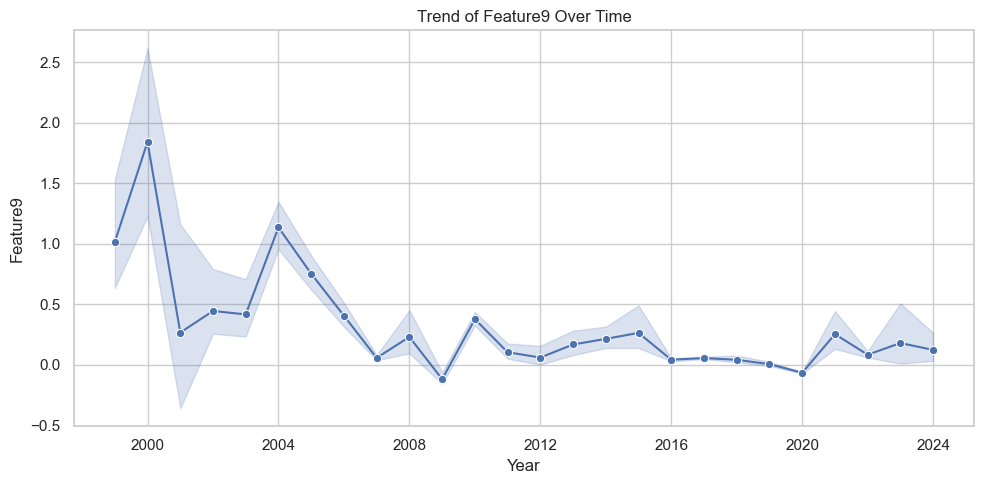

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your date column is in datetime format
df_1['Year'] = pd.to_datetime(df_1['Year'], format='%Y')

# Sort values by Year just in case
df_1 = df_1.sort_values('Year')

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Feature9', data=df_1, marker='o')
plt.title('Trend of Feature9 Over Time')
plt.xlabel('Year')
plt.ylabel('Feature9')
plt.grid(True)
plt.tight_layout()
plt.show()


In [102]:
# Check how many such rows exist before deletion
print("Rows with ' -   ' in Feature9:", df[df['Feature9'].astype(str).str.strip() == '-'].shape[0])

print("before" , df.shape)
# Drop rows where Feature9 has the string ' -   '
df = df[df['Feature9'].astype(str).str.strip() != '-'].copy()

# Confirm the change
print("Shape after removing invalid Feature9 rows:", df.shape)


Rows with ' -   ' in Feature9: 15
before (24751, 33)
Shape after removing invalid Feature9 rows: (24736, 33)


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24736 entries, 18959 to 24067
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        24736 non-null  int64  
 1   Company     24736 non-null  object 
 2   Feature1    24736 non-null  float64
 3   Feature2    24736 non-null  float64
 4   Feature3    24736 non-null  float64
 5   Feature4    24736 non-null  float64
 6   Feature5    24736 non-null  float64
 7   Feature6    24736 non-null  float64
 8   Feature7    24736 non-null  float64
 9   Feature8    24736 non-null  float64
 10  Feature9    24736 non-null  object 
 11  Feature10   24736 non-null  float64
 12  Feature11   24736 non-null  float64
 13  Feature12   24736 non-null  float64
 14  Feature13   24736 non-null  float64
 15  Feature14   24736 non-null  float64
 16  Feature15   24736 non-null  float64
 17  Feature16   24736 non-null  float64
 18  Feature17   24736 non-null  float64
 19  Feature18   24736 non

In [98]:
feature_cols = [f'Feature{i}' for i in range(1, 29)]  # Feature1 to Feature28
target_cols = [' Target 1 ', ' Target 2 ', ' Target 3 ']

In [103]:
cols = feature_cols + target_cols
df = df.sort_values(['Company', 'Year'])

# Step 2: Forward Fill — propagates past values forward (safe, no leakage)
df[cols] = df.groupby('Company')[cols].ffill()

# Step 3: Linear Interpolation — within each company (only forward, no future peeking)
df[cols] = df.groupby('Company')[cols].apply(
    lambda x: x.interpolate(method='linear', limit_direction='forward')
)

# Fill remaining NaNs (if any) with company-level median
for col in cols:
    df[col] = df.groupby('Company')[col].transform(lambda x: x.fillna(x.median()))

df[cols] = df[cols].fillna(df[cols].median())

In [105]:
df[cols] = df[cols].fillna(df[cols].median())

In [106]:
df.isnull().sum()

Year          0
Company       0
Feature1      0
Feature2      0
Feature3      0
Feature4      0
Feature5      0
Feature6      0
Feature7      0
Feature8      0
Feature9      0
Feature10     0
Feature11     0
Feature12     0
Feature13     0
Feature14     0
Feature15     0
Feature16     0
Feature17     0
Feature18     0
Feature19     0
Feature20     0
Feature21     0
Feature22     0
Feature23     0
Feature24     0
Feature25     0
Feature26     0
Feature27     0
Feature28     0
 Target 1     0
 Target 2     0
 Target 3     0
dtype: int64

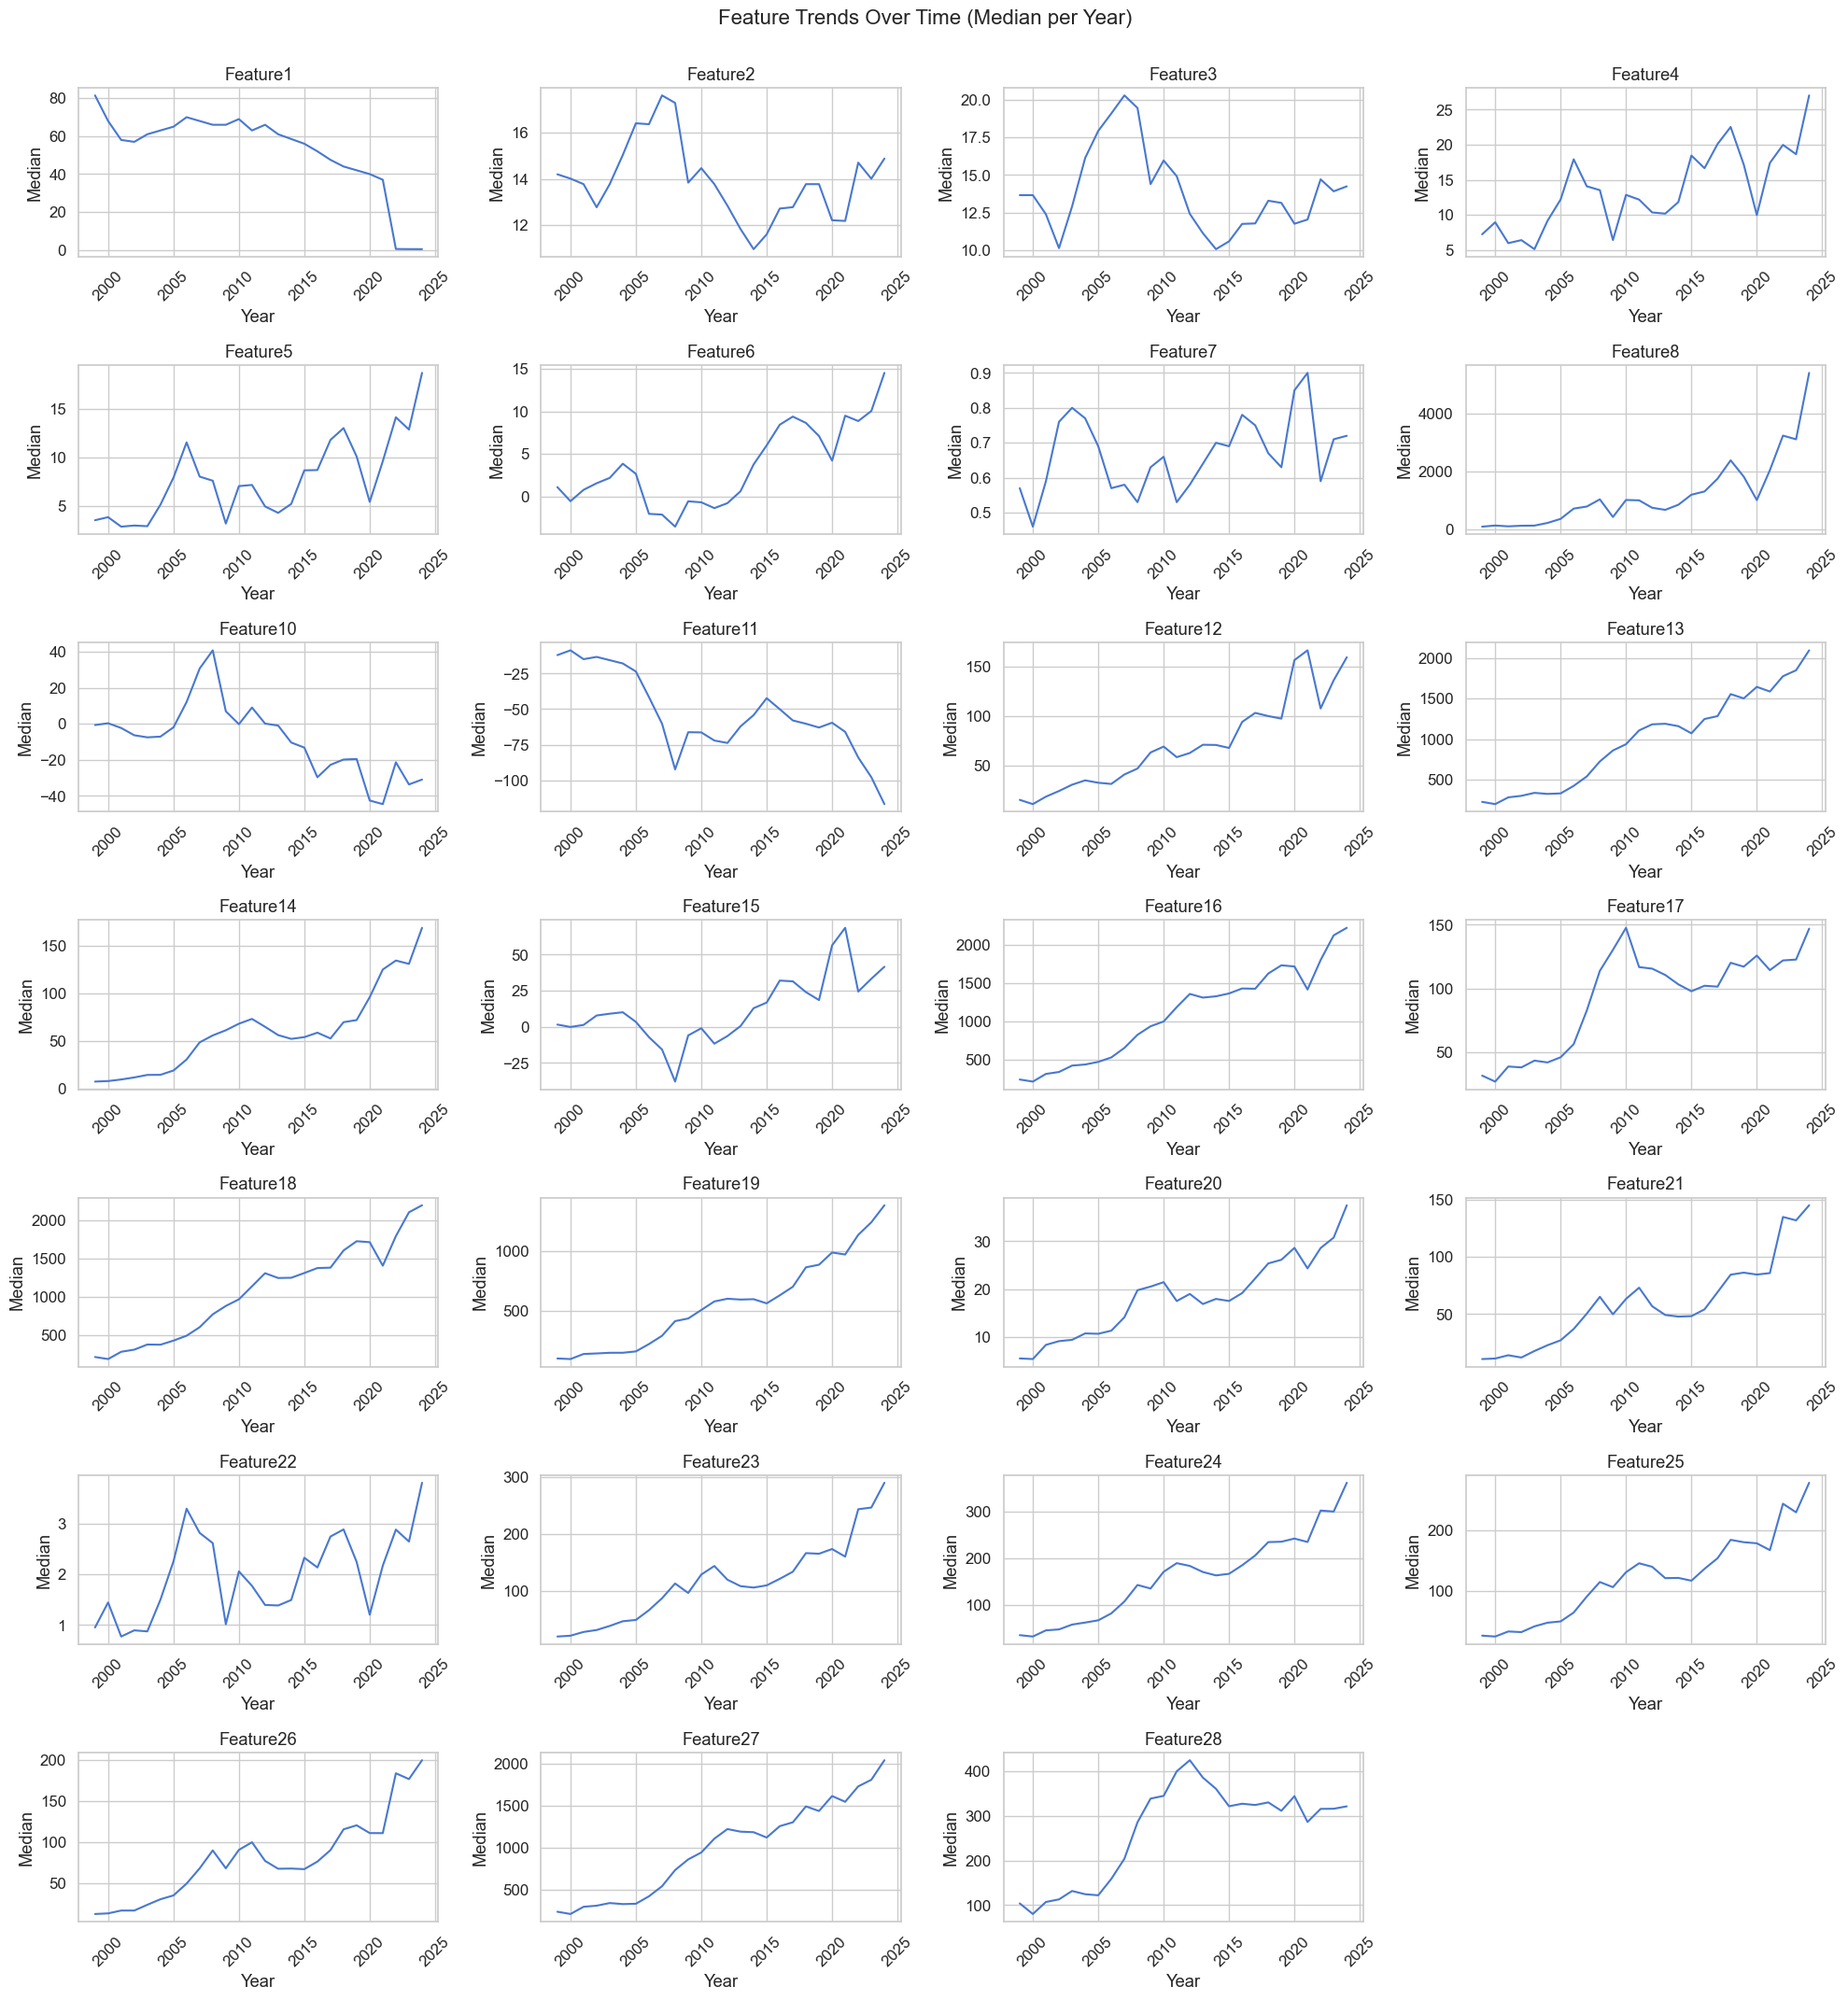

In [107]:
numeric_feature_cols = df[feature_cols].select_dtypes(include='number').columns.tolist()

# Now group by Year and calculate median
feature_trends = df.groupby('Year')[numeric_feature_cols].median()

# Plot each numeric feature's trend
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.1)

num_plots = len(numeric_feature_cols)
ncols = 4
nrows = (num_plots + ncols - 1) // ncols

plt.figure(figsize=(ncols * 5, nrows * 3))

for idx, col in enumerate(numeric_feature_cols):
    plt.subplot(nrows, ncols, idx + 1)
    plt.plot(feature_trends.index, feature_trends[col])
    plt.title(col)
    plt.xlabel("Year")
    plt.ylabel("Median")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Feature Trends Over Time (Median per Year)", fontsize=16, y=1.02)
plt.show()


In [111]:
from scipy.stats.mstats import winsorize

# 🔍 Select numeric feature columns (excluding ID columns)
numeric_cols = df.select_dtypes(include='number').columns.tolist()
exclude_cols = ['Year']  # optionally exclude identifier columns
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Apply Winsorization to each feature
for col in numeric_cols:
    col_values = df[col].values
    df[col] = winsorize(col_values, limits=[0.01, 0.01])  # cap bottom 1% and top 1%

print("Winsorization applied to numeric features.")


Winsorization applied to numeric features.



📊 Correlation of features with target:  Target 1 
Feature3     0.043658
Feature2     0.027182
Feature7     0.023397
Feature11    0.012157
Feature28    0.008188
Feature1     0.007620
Feature15    0.007120
Feature17    0.005960
Feature13    0.003159
Feature20    0.002953
Feature14    0.002720
Feature18   -0.000694
Feature16   -0.000861
Feature27   -0.001768
Feature24   -0.003050
Feature25   -0.003713
Feature12   -0.006057
Feature10   -0.006342
Feature19   -0.006724
Feature21   -0.007484
Feature23   -0.008047
Feature26   -0.009404
Feature6    -0.012444
Feature5    -0.015452
Feature8    -0.021646
Feature4    -0.059413
Feature22   -0.079781
Name:  Target 1 , dtype: float64


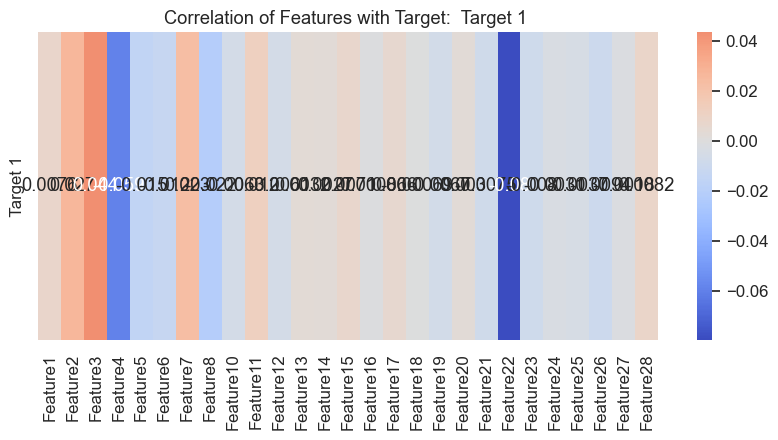


📊 Correlation of features with target:  Target 2 
Feature7     0.031552
Feature11    0.024087
Feature3     0.022559
Feature1     0.021011
Feature15    0.014360
Feature28    0.012991
Feature17    0.010967
Feature2     0.006118
Feature13    0.005584
Feature14    0.004856
Feature20    0.004460
Feature16   -0.000590
Feature18   -0.000728
Feature27   -0.001826
Feature24   -0.003693
Feature25   -0.003732
Feature12   -0.007569
Feature6    -0.009892
Feature19   -0.010480
Feature21   -0.012010
Feature23   -0.013229
Feature10   -0.013291
Feature26   -0.014045
Feature5    -0.017527
Feature8    -0.031750
Feature4    -0.072725
Feature22   -0.103000
Name:  Target 2 , dtype: float64


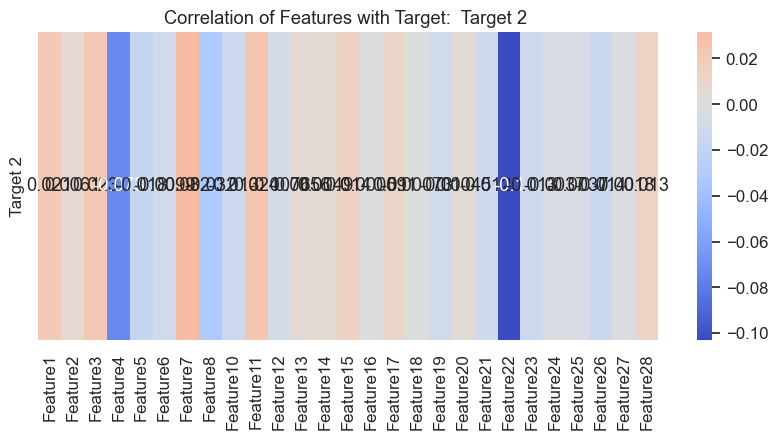


📊 Correlation of features with target:  Target 3 
Feature11    0.032542
Feature7     0.032508
Feature1     0.024954
Feature15    0.018044
Feature3     0.004260
Feature28    0.003450
Feature20    0.003278
Feature17    0.002261
Feature14   -0.002585
Feature13   -0.004178
Feature2    -0.006353
Feature27   -0.008490
Feature12   -0.009346
Feature6    -0.010997
Feature16   -0.011048
Feature18   -0.011333
Feature24   -0.013350
Feature25   -0.013615
Feature5    -0.014232
Feature10   -0.018871
Feature19   -0.020506
Feature23   -0.022982
Feature21   -0.023282
Feature26   -0.024781
Feature8    -0.033809
Feature4    -0.065855
Feature22   -0.100856
Name:  Target 3 , dtype: float64


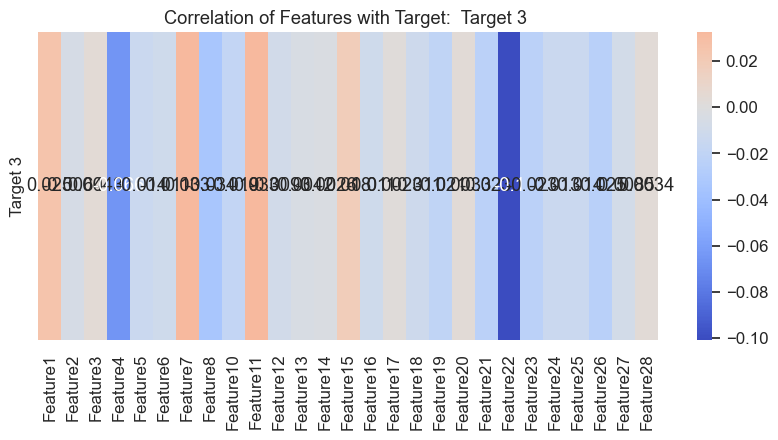

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Store results
correlation_results = {}

# Loop through each target and calculate correlation with all features
for target in target_cols:
    correlations = df[feature_cols + [target]].corr()[target].drop(target)
    correlation_results[target] = correlations

    # Display correlation values
    print(f"\n📊 Correlation of features with target: {target}")
    print(correlations.sort_values(ascending=False))


In [131]:
# Define identifier and target columns
id_cols = ['Year', 'Company']
target = ' Target 1 '
target_cols = [' Target 1 ', ' Target 2 ', ' Target 3 ']

# Extract feature columns (exclude ID and all target columns)
feature_cols = [col for col in df.columns if col not in id_cols + target_cols]

# Create df_1 with all features and Target1
df_1 = df[id_cols + feature_cols + [target]].copy()

# Display basic info
print("Shape of df_1:", df_1.shape)
print("Columns in df_1:\n", df_1.columns.tolist())
df_1.head()


Shape of df_1: (24736, 31)
Columns in df_1:
 ['Year', 'Company', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10', 'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Feature15', 'Feature16', 'Feature17', 'Feature18', 'Feature19', 'Feature20', 'Feature21', 'Feature22', 'Feature23', 'Feature24', 'Feature25', 'Feature26', 'Feature27', 'Feature28', ' Target 1 ']


,Year,Company,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Target 1
18959,2020,360 ONE,253.00,7.56,6.82,29.52,23.55,2.37,2.07,8606.08,...,6.71,201.16,2.876844,327.44,829.03,788.01,286.42,8197.71,8838.10,-51.37
20893,2021,360 ONE,239.00,9.11,12.69,29.52,23.55,2.37,0.51,10897.02,...,4.70,369.19,3.853574,527.89,941.44,898.47,484.92,4234.86,5076.69,18.58
22046,2022,360 ONE,1.86,13.40,19.75,29.52,23.55,2.37,0.83,14825.74,...,6.02,577.74,3.853574,793.04,1162.89,1121.15,751.30,4914.95,5807.58,5.24
22474,2023,360 ONE,2.05,13.34,21.41,29.52,23.55,2.37,-1.06,15342.12,...,4.89,657.93,3.853574,896.60,1295.80,1249.49,850.29,5001.57,6783.67,29.26
23731,2024,360 ONE,2.47,14.47,24.48,29.52,23.55,2.37,-0.28,22009.77,...,3.82,804.21,3.853574,1065.18,1708.67,1652.03,1008.54,6554.96,9471.93,29.26


In [132]:
correlation_matrix = df_1.corr()

correlation_with_target1 = correlation_matrix[' Target 1 '].drop(' Target 1 ')

# Sort correlations by strength (optional)
correlation_with_target1 = correlation_with_target1.sort_values(ascending=False)

# Display result
print(correlation_with_target1)

Feature3     0.043658
Feature2     0.027182
Year         0.024584
Feature7     0.023397
Feature11    0.012157
Feature28    0.008188
Feature1     0.007620
Feature15    0.007120
Feature17    0.005960
Feature13    0.003159
Feature20    0.002953
Feature14    0.002720
Feature18   -0.000694
Feature16   -0.000861
Feature27   -0.001768
Feature24   -0.003050
Feature25   -0.003713
Feature12   -0.006057
Feature10   -0.006342
Feature19   -0.006724
Feature21   -0.007484
Feature23   -0.008047
Feature26   -0.009404
Feature6    -0.012444
Feature5    -0.015452
Feature8    -0.021646
Feature4    -0.059413
Feature22   -0.079781
Name:  Target 1 , dtype: float64


In [133]:
drop_columns = ['Year','Company']
df_1 = df_1.drop(columns=drop_columns)

In [134]:
df_1.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Target 1
18959,253.00,7.56,6.82,29.52,23.55,2.37,2.07,8606.08,0.0,2289.67,...,6.71,201.16,2.876844,327.44,829.03,788.01,286.42,8197.71,8838.10,-51.37
20893,239.00,9.11,12.69,29.52,23.55,2.37,0.51,10897.02,0,-4835.61,...,4.70,369.19,3.853574,527.89,941.44,898.47,484.92,4234.86,5076.69,18.58
22046,1.86,13.40,19.75,29.52,23.55,2.37,0.83,14825.74,0,251.23,...,6.02,577.74,3.853574,793.04,1162.89,1121.15,751.30,4914.95,5807.58,5.24
22474,2.05,13.34,21.41,29.52,23.55,2.37,-1.06,15342.12,0,555.55,...,4.89,657.93,3.853574,896.60,1295.80,1249.49,850.29,5001.57,6783.67,29.26
23731,2.47,14.47,24.48,29.52,23.55,2.37,-0.28,22009.77,0,1977.74,...,3.82,804.21,3.853574,1065.18,1708.67,1652.03,1008.54,6554.96,9471.93,29.26


In [135]:
X = df_1[feature_cols]
y = df_1[' Target 1 ']

X.

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28
18959,253.00,7.56,6.82,29.52,23.55,2.37,2.07,8606.08,0.0,2289.67,...,2991.50,6.71,201.16,2.876844,327.44,829.03,788.01,286.42,8197.71,8838.10
20893,239.00,9.11,12.69,29.52,23.55,2.37,0.51,10897.02,0,-4835.61,...,2827.77,4.70,369.19,3.853574,527.89,941.44,898.47,484.92,4234.86,5076.69
22046,1.86,13.40,19.75,29.52,23.55,2.37,0.83,14825.74,0,251.23,...,3023.53,6.02,577.74,3.853574,793.04,1162.89,1121.15,751.30,4914.95,5807.58
22474,2.05,13.34,21.41,29.52,23.55,2.37,-1.06,15342.12,0,555.55,...,3121.95,4.89,657.93,3.853574,896.60,1295.80,1249.49,850.29,5001.57,6783.67
23731,2.47,14.47,24.48,29.52,23.55,2.37,-0.28,22009.77,0,1977.74,...,3449.73,3.82,804.21,3.853574,1065.18,1708.67,1652.03,1008.54,6554.96,9471.93


In [125]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

feature_cols = [col for col in df_1.columns if col not in ['Year', 'Target1']]
X = df_1[feature_cols]
y = df_1['Target1']

# Step 4: Split into time-based train-test sets (e.g., 80-20 split)
train_size = int(len(df_1) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Step 5: Scale using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
X_df  = pd.DataFrame(X_train_scaled)

In [151]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.582785,-0.682537,-0.523365,-0.068811,0.126057,-0.040548,0.647825,0.042488,-0.080392,1.553095,...,0.006488,-0.278585,-0.131585,-0.133332,-0.162228,-0.094997,-0.066707,-0.130869,0.049124,0.059514
1,0.524017,-0.563399,-0.130377,-0.068811,0.126057,-0.040548,-0.022677,0.146071,-0.080392,-3.464569,...,-0.013510,-0.281635,0.004217,0.045292,-0.068767,-0.065296,-0.033214,-0.015874,-0.126166,-0.064956
2,-0.471440,-0.233656,0.342278,-0.068811,0.126057,-0.040548,0.114862,0.323704,-0.080392,0.117613,...,0.010400,-0.279632,0.172768,0.045292,0.054860,-0.006784,0.034304,0.138447,-0.096083,-0.040770
3,-0.470642,-0.238268,0.453413,-0.068811,0.126057,-0.040548,-0.697477,0.347052,-0.080392,0.331917,...,0.022421,-0.281347,0.237578,0.045292,0.103146,0.028333,0.073218,0.195794,-0.092252,-0.008470
4,-0.468879,-0.151412,0.658944,-0.068811,0.126057,-0.040548,-0.362226,0.648524,-0.080392,1.333432,...,0.062456,-0.282970,0.355802,0.045292,0.181747,0.137422,0.195271,0.287472,-0.023540,0.080488


In [136]:
import numpy as np

def reshape_to_lstm_format(X, timesteps=3):
    X_seq = []
    for i in range(len(X) - timesteps):
        X_seq.append(X[i:i+timesteps])
    return np.array(X_seq)

def align_targets(y, timesteps=3):
    return y[timesteps:].reset_index(drop=True)

In [156]:
timesteps = 1

X_train_seq = reshape_to_lstm_format(X_train_scaled, timesteps)
X_test_seq = reshape_to_lstm_format(X_test_scaled, timesteps)

y_train_seq = align_targets(y_train, timesteps)
y_test_seq = align_targets(y_test, timesteps)

In [157]:
X_train_seq.shape[2]

28

In [158]:
X

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28
18959,253.00,7.56,6.82,29.52,23.55,2.37,2.07,8606.08,0.0,2289.67,...,2991.50,6.71,201.16,2.876844,327.44,829.03,788.01,286.42,8197.71,8838.10
20893,239.00,9.11,12.69,29.52,23.55,2.37,0.51,10897.02,0,-4835.61,...,2827.77,4.70,369.19,3.853574,527.89,941.44,898.47,484.92,4234.86,5076.69
22046,1.86,13.40,19.75,29.52,23.55,2.37,0.83,14825.74,0,251.23,...,3023.53,6.02,577.74,3.853574,793.04,1162.89,1121.15,751.30,4914.95,5807.58
22474,2.05,13.34,21.41,29.52,23.55,2.37,-1.06,15342.12,0,555.55,...,3121.95,4.89,657.93,3.853574,896.60,1295.80,1249.49,850.29,5001.57,6783.67
23731,2.47,14.47,24.48,29.52,23.55,2.37,-0.28,22009.77,0,1977.74,...,3449.73,3.82,804.21,3.853574,1065.18,1708.67,1652.03,1008.54,6554.96,9471.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22651,0.11,35.98,29.81,12.94,12.85,14.45,0.73,6327.46,0,-440.09,...,1714.87,65.95,488.82,3.689761,767.00,789.19,675.18,652.99,1966.36,193.56
23889,0.12,31.40,25.83,22.57,21.95,271.96,0.74,11544.49,0.01,-106.51,...,2247.50,65.64,511.46,5.136592,815.11,839.56,713.79,689.34,2583.33,265.74
13242,1.00,0.21,0.14,1421.30,497.38,-18.03,8.80,380.44,0.0,21.20,...,31.23,0.04,0.03,12.181876,0.10,0.10,0.05,0.05,34.33,0.25
23041,0.17,23.89,22.48,27.30,50.18,-24.49,0.44,1684.02,0.04,127.49,...,391.60,5.30,61.68,4.300358,89.23,92.62,76.77,73.38,420.51,25.32


In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# MLP model (with flattened sequence input)
model_mlp = Sequential([
    Flatten(input_shape=(timesteps, X_train_seq.shape[2])),

    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(32),
    LeakyReLU(alpha=0.1),

    Dense(1)  # Output layer for Target1
])

# Compile model
model_mlp.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-5, verbose=1)

# Train model
history_mlp = model_mlp.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
619/619 [==============================] - 3s 4ms/step - loss: 6349.7188 - mae: 53.2470 - val_loss: 6712.2192 - val_mae: 55.4509 - lr: 5.0000e-04
Epoch 2/100
619/619 [==============================] - 2s 3ms/step - loss: 6275.5786 - mae: 53.7825 - val_loss: 6716.7949 - val_mae: 54.6524 - lr: 5.0000e-04
Epoch 3/100
619/619 [==============================] - 2s 3ms/step - loss: 6239.6816 - mae: 53.6621 - val_loss: 6718.0576 - val_mae: 54.8291 - lr: 5.0000e-04
Epoch 4/100
619/619 [==============================] - 2s 3ms/step - loss: 6228.6650 - mae: 53.6442 - val_loss: 6723.1055 - val_mae: 54.8213 - lr: 5.0000e-04
Epoch 5/100
619/619 [==============================] - 2s 3ms/step - loss: 6223.6655 - mae: 53.5311 - val_loss: 6729.2886 - val_mae: 55.4404 - lr: 5.0000e-04
Epoch 6/100
607/619 [============================>.] - ETA: 0s - loss: 6220.4839 - mae: 53.6382
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
619/619 [=============================

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Updated LSTM architecture
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(timesteps, X_train_seq.shape[2])),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    GlobalAveragePooling1D(),

    Dense(32),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(1)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Early stopping and LR scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-5, verbose=1)

# Train model
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
619/619 [==============================] - 6s 5ms/step - loss: 6467.3911 - mae: 52.0290 - val_loss: 6802.7500 - val_mae: 54.6112 - lr: 5.0000e-04
Epoch 2/100
619/619 [==============================] - 2s 4ms/step - loss: 6315.5308 - mae: 53.5586 - val_loss: 6775.9956 - val_mae: 55.1829 - lr: 5.0000e-04
Epoch 3/100
619/619 [==============================] - 3s 4ms/step - loss: 6294.9453 - mae: 53.7214 - val_loss: 6769.2979 - val_mae: 54.8853 - lr: 5.0000e-04
Epoch 4/100
619/619 [==============================] - 3s 5ms/step - loss: 6283.2173 - mae: 53.6002 - val_loss: 6761.3667 - val_mae: 55.0967 - lr: 5.0000e-04
Epoch 5/100
619/619 [==============================] - 3s 4ms/step - loss: 6271.6123 - mae: 53.6717 - val_loss: 6757.0112 - val_mae: 55.1522 - lr: 5.0000e-04
Epoch 6/100
619/619 [==============================] - 3s 5ms/step - loss: 6259.3979 - mae: 53.6447 - val_loss: 6753.9517 - val_mae: 55.4051 - lr: 5.0000e-04
Epoch 7/100
619/619 [==============================]

KeyboardInterrupt: 

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    LSTM(64, activation='tanh', input_shape=(timesteps, X_train_seq.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
619/619 [==============================] - 14s 13ms/step - loss: 6350.2334 - mae: 53.3828 - val_loss: 6744.2036 - val_mae: 54.7648
Epoch 2/50
619/619 [==============================] - 10s 16ms/step - loss: 6285.2695 - mae: 53.8261 - val_loss: 6730.1885 - val_mae: 55.4171
Epoch 3/50
619/619 [==============================] - 10s 16ms/step - loss: 6261.0400 - mae: 53.7938 - val_loss: 6723.9043 - val_mae: 55.4187
Epoch 4/50
619/619 [==============================] - 8s 13ms/step - loss: 6241.2026 - mae: 53.7135 - val_loss: 6728.1177 - val_mae: 54.9644
Epoch 5/50
619/619 [==============================] - 7s 11ms/step - loss: 6224.1494 - mae: 53.6319 - val_loss: 6737.9092 - val_mae: 55.0312
Epoch 6/50
619/619 [==============================] - 8s 12ms/step - loss: 6209.9229 - mae: 53.5806 - val_loss: 6742.6938 - val_mae: 55.5636
Epoch 7/50
619/619 [==============================] - 9s 14ms/step - loss: 6196.6230 - mae: 53.4881 - val_loss: 6755.2275 - val_mae: 55.9005
Epoch 8/50

In [144]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization, Input, Add
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Custom weighted MSE loss (penalizes large errors more)
def weighted_mse_loss(y_true, y_pred):
    weights = tf.where(tf.abs(y_true) > tf.reduce_mean(tf.abs(y_true)), 2.0, 1.0)
    return tf.reduce_mean(weights * tf.square(y_true - y_pred))

# Attention layer
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()
    
    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], 1),
                                initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[1], 1),
                                initializer='zeros', trainable=True)
    
    def call(self, inputs):
        e = tf.tanh(tf.matmul(inputs, self.W) + self.b)
        alpha = tf.nn.softmax(e, axis=1)
        context = inputs * alpha
        return tf.reduce_sum(context, axis=1)

# Build enhanced LSTM model
inputs = Input(shape=(timesteps, X_train_seq.shape[2]))
x = LSTM(64, return_sequences=True, activation='tanh')(inputs)
x = LayerNormalization()(x)
x = Dropout(0.3)(x)

# Second LSTM with residual connection
lstm2 = LSTM(64, return_sequences=True, activation='tanh')(x)
lstm2 = LayerNormalization()(lstm2)
x = Add()([x, lstm2])  # Residual connection
x = Dropout(0.3)(x)

# Third LSTM
x = LSTM(64, return_sequences=True, activation='tanh')(x)
x = LayerNormalization()(x)
x = Dropout(0.3)(x)

# Attention layer
x = AttentionLayer()(x)

# Dense layers
x = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.3)(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss=weighted_mse_loss, metrics=['mae'])

# Train model
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
619/619 [==============================] - 29s 28ms/step - loss: 11825.8506 - mae: 56.3577 - val_loss: 12422.7031 - val_mae: 57.5181
Epoch 2/10
619/619 [==============================] - 20s 32ms/step - loss: 11654.6680 - mae: 57.4854 - val_loss: 12455.0859 - val_mae: 57.1223
Epoch 3/10
619/619 [==============================] - 15s 24ms/step - loss: 11646.3994 - mae: 57.2554 - val_loss: 12371.6895 - val_mae: 58.7971
Epoch 4/10
619/619 [==============================] - 13s 22ms/step - loss: 11588.2842 - mae: 57.3258 - val_loss: 12418.3447 - val_mae: 56.9925
Epoch 5/10
619/619 [==============================] - 12s 20ms/step - loss: 11552.9951 - mae: 57.1853 - val_loss: 12345.0293 - val_mae: 58.8212
Epoch 6/10
619/619 [==============================] - 13s 20ms/step - loss: 11497.7295 - mae: 57.2349 - val_loss: 12362.3574 - val_mae: 59.6502
Epoch 7/10
619/619 [==============================] - 12s 20ms/step - loss: 11453.9238 - mae: 57.1606 - val_loss: 12450.1797 - val_mae: 